In [1]:
%matplotlib inline

In [2]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

#### 7.1 선형 판별 분석법과 이차 판별 분석법

In [12]:
# 가능도 계산
# 정상인의 체온 범위 평균 37.5, 표준편차 0.1 일때
rv_normal = sp.stats.norm(loc = 37.5, scale = 0.1)

In [18]:
# 체온이 37.8일때 정상일 확률
rv_normal.pdf(37.8)

0.044318484119383855

In [14]:
# 독감에 걸린 사람의 체온 평균 40.1, 표준편차 0.2 일때
rv_flu = sp.stats.norm(loc=40.1, scale = 0.2)

In [16]:
# 체온이 38.5도일때 독감일 확률 현저히 낮음
rv_flu.pdf(38.5)

2.5261355417683027e-14

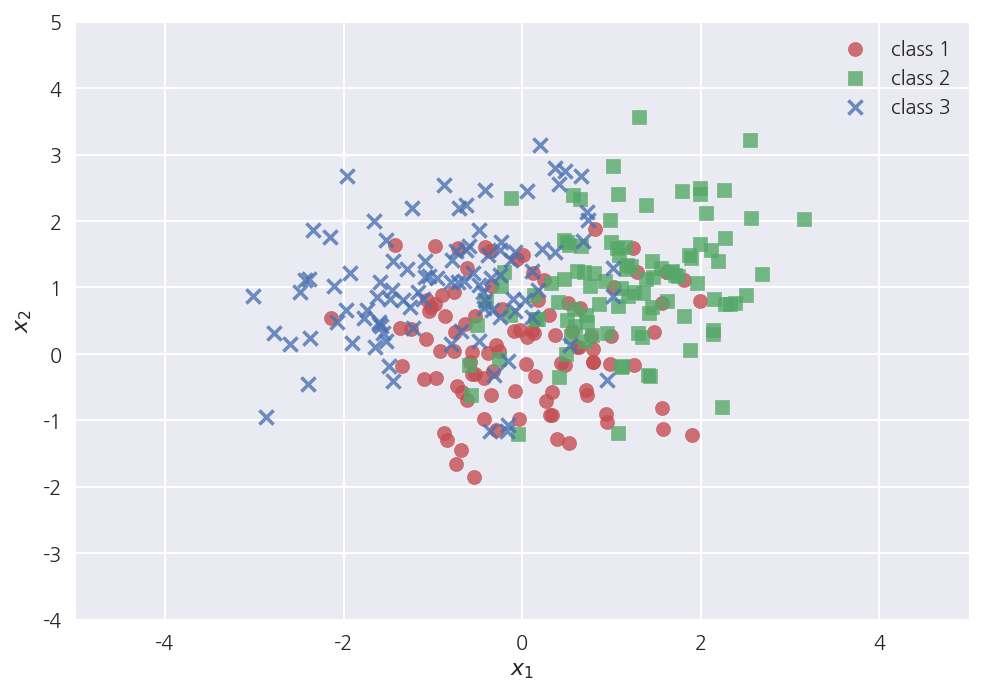

In [34]:
N = 100
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

##### 이차판별분석법
- priors_: 각 클래스  k 의 사전확률.
- means_: 각 클래스  k 에서  x 의 기댓값 벡터  μk 의 추정치 벡터.
- covariance_: 각 클래스  k 에서  x 의 공분산 행렬  Σk 의 추정치 행렬. (생성자 인수 store_covariance 값- 이 True인 경우에만 제공)

##### QDA

In [4]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [5]:
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [6]:
# mu1, mu2, mu3 구한것
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [20]:
# sigma1
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [21]:
# sigma2
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [22]:
# 예제 빨간색이면서 2,-1일 확률, 파란색이면서 2, -1일 확률 등등
# 가능도를 구하는 것
rv1 = sp.stats.multivariate_normal(X1.mean(axis=0), np.cov(X1.T))
rv2 = sp.stats.multivariate_normal(X2.mean(axis=0), np.cov(X2.T))
rv3 = sp.stats.multivariate_normal(X3.mean(axis=0), np.cov(X3.T))
# p([2,-1] | y = 3), p([2,-1] | y = 2), ([2,-1] | y = 3)
rv1.pdf([2, -1]), rv2.pdf([2, -1]), rv3.pdf([2, -1])

(0.0065621236568562755, 0.0034060346804690644, 1.5412251295786176e-05)

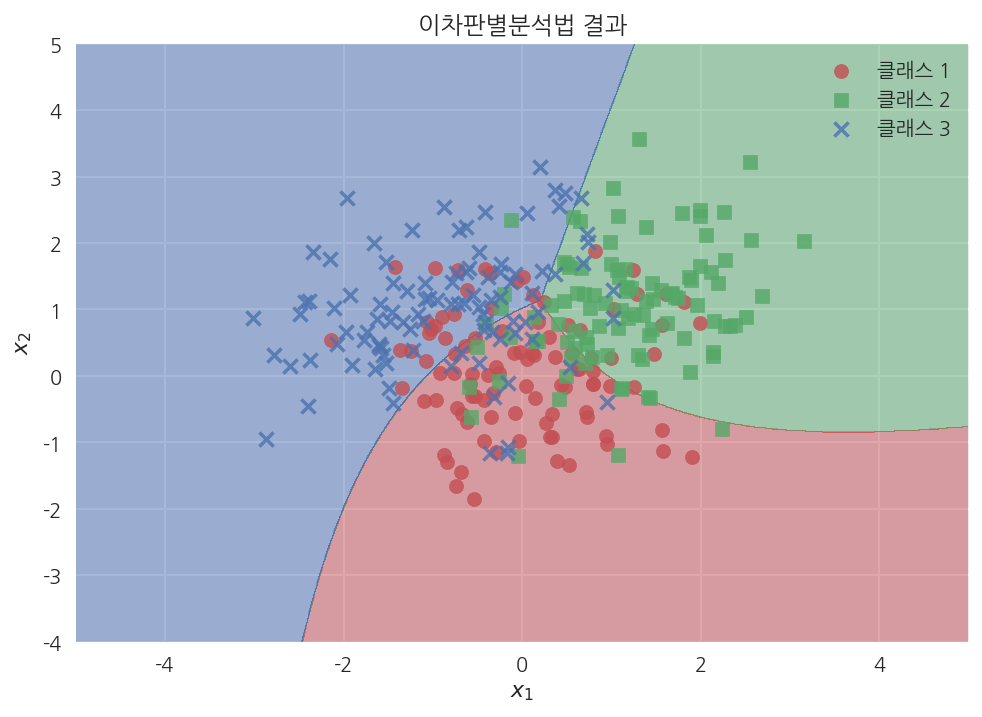

In [9]:
# 이 혹률분포를 사용하여 분류한 결과
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="클래스 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="클래스 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="클래스 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("이차판별분석법 결과")
plt.legend()
plt.show()

##### 연습문제
- QDA를 사용하여 붓꽃 분류문제 풀고 ROC커브

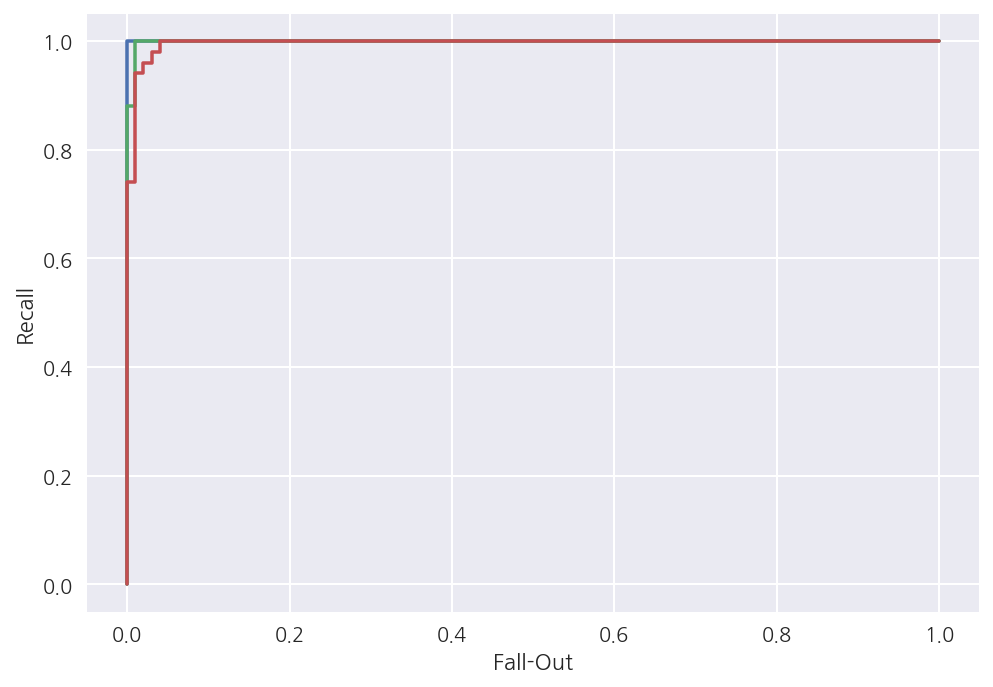

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

iris = load_iris()
X = iris.data
# label_binalize: 원핫 인코딩을 수행함
y = label_binarize(iris.target, [0, 1, 2])

# memory allocation
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for x in range(3):
    model = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y[:, x])
    fpr[x], tpr[x], thr[x] = roc_curve(y[:, x], model.predict_proba(X)[:, 1])
    plt.plot(fpr[x], tpr[x])
    
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.show()

##### LDA

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(
    n_components=3, solver="svd", store_covariance=True).fit(X, y)

In [36]:
# 선형판별분석법은 기댓값 벡터만 클래스에 따라 달라지고 공분산 행렬은 공통으로 추정
lda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [37]:
lda.covariance_

array([[0.7718516 , 0.13942905],
       [0.13942905, 0.7620019 ]])

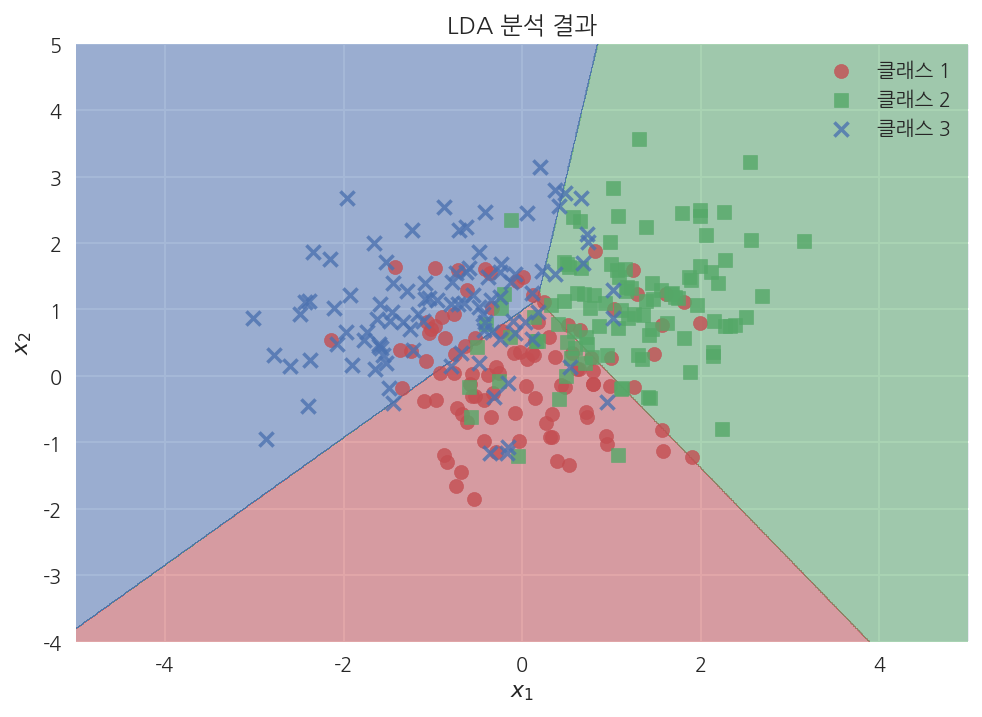

In [38]:
# 결과는 직선인 경계선을 가짐
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(lda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="클래스 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="클래스 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="클래스 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title("LDA 분석 결과")
plt.show()

##### 연습문제2
- LDA를 사용하여 붓꽃 분류문제를 풀고 ROC커브

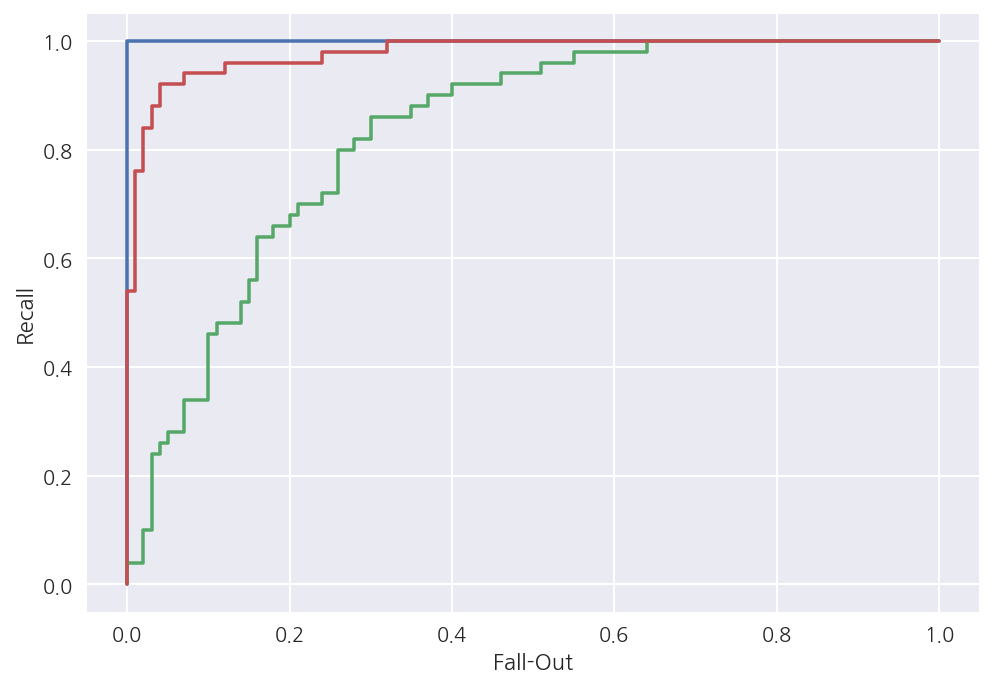

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
X = iris.data
# label_binalize: 원핫 인코딩을 수행함
y = label_binarize(iris.target, [0, 1, 2])

# memory allocation
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for x in range(3):
    model = LinearDiscriminantAnalysis(store_covariance=True).fit(X, y[:, x])
    fpr[x], tpr[x], thr[x] = roc_curve(y[:, x], model.predict_proba(X)[:, 1])
    plt.plot(fpr[x], tpr[x])
    
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.show()